In [1]:
# -*-coding:utf-8 -*-
# import all the libraries 
# python==3.8; jupyterlab==3.0.12; lumicks.pylake==0.8.1; matplotlib==3.3.4; more-itertools==8.7.0;
# npTDMS==1.1.0; numpy==1.20.1; opencv-python==4.5.1.48; pandas==1.2.3; scipy==1.6.1; tifffile==2021.3.5
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize
%matplotlib widget

# Plot reference 
1. Setting a relative frequency in a matplotlib histogram [https://stackoverflow.com/questions/9767241/setting-a-relative-frequency-in-a-matplotlib-histogram]
2. Bin size in Matplotlib (Histogram) [https://stackoverflow.com/questions/6986986/bin-size-in-matplotlib-histogram]
3. logscale axis [https://stackoverflow.com/questions/773814/plot-logarithmic-axes-with-matplotlib-in-python]
4. binwidth for histogram Using the The Freedman-Diaconis Rules to calculate the binwidth: The bin-width is set to h=2×IQR×n^(−1/3),the number of bins is (max−min)/h; where IQR is the interquartile range of the data and n is the number of observations in the sample [https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram]
5. Alternatively, The simplest method is to set the number of bins equal to the square root of the number of values you are binning.
6. Generate random numbers from exponential distribution [https://stackoverflow.com/questions/47319277/generate-random-numbers-from-exponential-distribution-and-model-using-python]
7. error band plot [https://stackoverflow.com/questions/55368485/draw-error-shading-bands-on-line-plot-python?noredirect=1&lq=1]

In [57]:
data = pd.read_csv(r'D:\Google Drive\DNAp_project_updated_jan2022\RawData_ProcessingData\20190529-012-very typical\image data-cycle#1-Intensity along DNAp-filtered.txt', sep=" ", header=None)
data.columns = ["time", "filtered_intensity"]
# data = data["filtered_intensity"] - 30
print(data)
ind = np.array(np.where((data['time'] > 64) & (data['time'] < 77))).T
data = np.array([data['filtered_intensity'][i] for i in ind ]) -27

        time  filtered_intensity
0     10.660              35.190
1     10.873              34.571
2     11.087              35.286
3     11.300              36.333
4     11.513              36.286
..       ...                 ...
516  120.674              38.095
517  120.887              38.524
518  121.100              39.548
519  121.313              38.905
520  121.526              35.262

[521 rows x 2 columns]


[-2.02195488  2.12413537  6.27022561 10.41631586 14.56240611 18.70849635
 22.8545866  27.00067684 31.14676709 35.29285734 39.43894758 43.58503783]


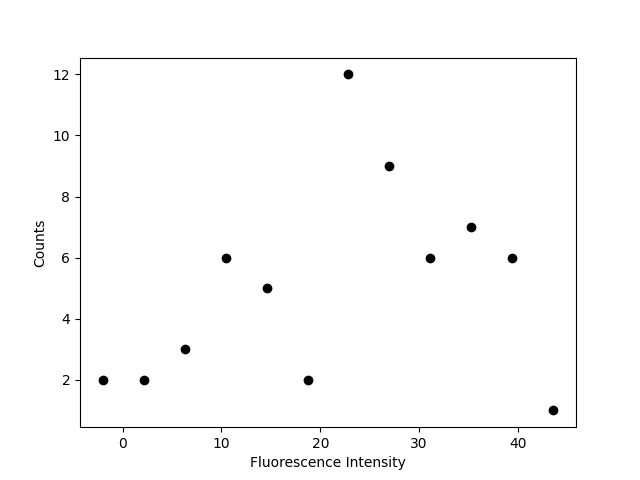

In [58]:
# # Generate random numbers from exponential distribution
# data = np.random.exponential(5, size=10000)
# print((data))

#calculate interquartile range and subsequent binwidth, and then histogram
q3, q1 = np.percentile(data, [75 ,25])
iqr = q3 - q1
binwidth = (2* iqr) * len(data) ** (-1/2)

ydata,base = np.histogram(data,bins = np.arange(min(data), max(data)+ binwidth, binwidth))
xdata = base[:-1] + 0.5*binwidth
print(xdata)
plt.figure()
plt.scatter(xdata, ydata, color="k")
# plt.yscale('log')
# plt.ylim(0.01,1)
plt.ylabel('Counts')
plt.xlabel('Fluorescence Intensity')
plt.show()

(2000,)


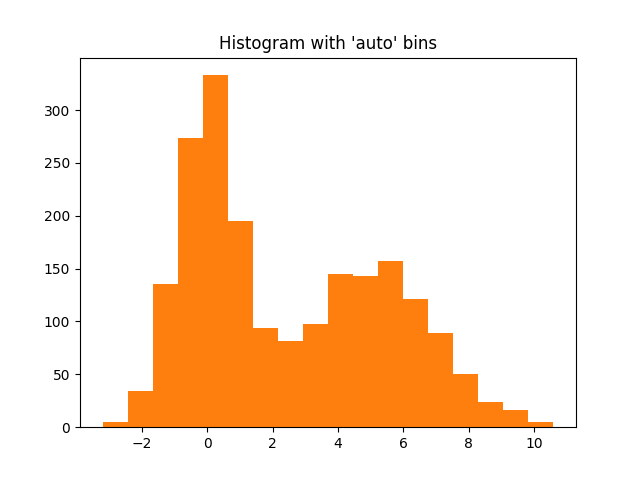

[ 1.3315865   0.71527897 -1.54540029 ...  5.74446677  6.22449239
  8.42055014]


In [67]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),
               rng.normal(loc=5, scale=2, size=1000)))
print(a.shape)
_ = plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()
print(a)

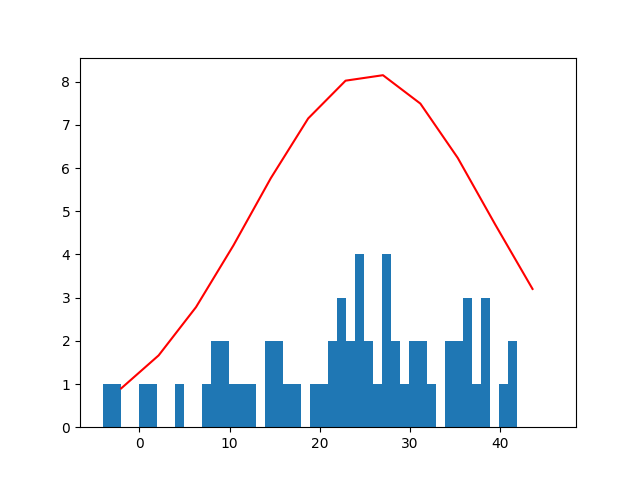

In [70]:
from scipy.optimize import leastsq
def double_gaussian( x, params ):
    (c1, mu1, sigma1, c2, mu2, sigma2) = params
    res =   c1 * np.exp( - (x - mu1)**2.0 / (2.0 * sigma1**2.0) ) \
          + c2 * np.exp( - (x - mu2)**2.0 / (2.0 * sigma2**2.0) )
    return res

# # perform the fit
# popt, pcov = scipy.optimize.curve_fit(monoExp, xdata, ydata)
# # a is the initial value A1, k is the decay constant
# a, k = popt

def double_gaussian_fit( params ):
    fit = double_gaussian( xdata, params )
    return (fit - ydata)

# Least squares fit. Starting values found by inspection.
fit = leastsq( double_gaussian_fit, [2,10,1.0,4,20,1.0] )

plt.figure()
# plt.hist(data,bins = np.arange(min(data), max(data)+ binwidth))
_ = plt.hist(data, bins=np.arange(min(data), max(data)+ binwidth)) 
plt.plot(xdata, double_gaussian( xdata, fit[0] ), c='r' )
plt.show()

R² = 0.9988111937401036


Text(0, 0.5, 'Probability Density Function')

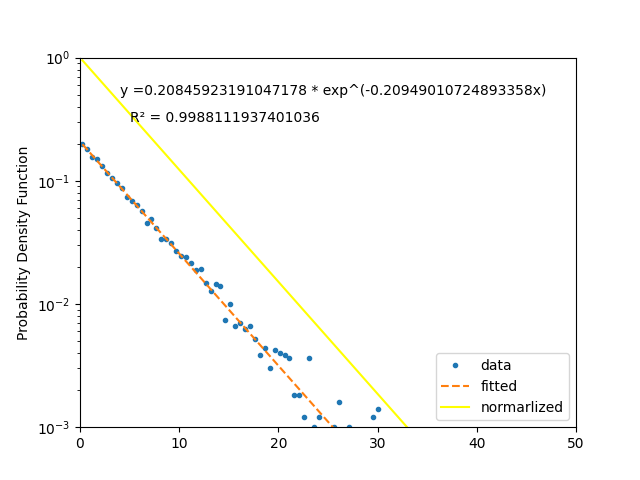

In [74]:
# fit the data with a monoExponential decay curve
def monoExp(x, a, k):
    return a * np.exp(-k * x) 

# perform the fit
popt, pcov = scipy.optimize.curve_fit(monoExp, xdata, ydata)
# a is the initial value A1, k is the decay constant
a, k = popt

# determine quality of the fit
squaredDiffs = np.square(ydata - monoExp(xdata, a, k))
squaredDiffsFromMean = np.square(ydata - np.mean(ydata))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot extroplating fitted curve
xdata2 = np.arange(0,15,0.5)
ydata2 = monoExp(xdata2, a, k)/a
# plot the results
plt.figure()
plt.plot(xdata, ydata, '.', label="data")
plt.plot(xdata, monoExp(xdata, a, k), '--', label="fitted")
plt.plot(xdata, monoExp(xdata, a, k)/a, 'yellow', label="normarlized")
# plt.plot(xdata2,ydata2)

plt.text(4,0.5,'y =' + str(a) + ' * exp^('+ str(-k)+'x)')
plt.text(5,0.3,'R² = ' + str(rSquared))
plt.yscale('log')
plt.ylim(0.001,1)
plt.xlim(0,50)
plt.legend(loc = 'lower right')
plt.ylabel('Probability Density Function')
# plt.xlabel('Time(s)')
# plt.title("Duration Analysis")
# fig.savefig(trace_file[:-4]+ '_duration-analysis' +'.png', dpi=150)

# Form now on, we start to bootstrap the data

In [66]:
# Generate random numbers from exponential distribution
data = np.random.exponential(5, size=1000)
# print(len(data))

In [76]:
# random sampling
resampling_ratio = 0.5
resampling_times = 1000

# define a monoExponential decay fit function
def monoExp(x, a, k):
    return a * np.exp(-k * x) 

# define a function to compute the decay constant from an exponential decay fit, with return of decay constant
def ExoDecFit (data):
    #calculate interquartile range and subsequent binwidth, and then histogram
    q3, q1 = np.percentile(data, [75 ,25])
    iqr = q3 - q1
    binwidth = (2* iqr) * len(data) ** (-1/3)
    ydata,base = np.histogram(data,bins = np.arange(min(data), max(data)+ binwidth, binwidth), density = 'True')
    xdata = base[:-1] + 0.5*binwidth

    # perform the fit
    popt, pcov = scipy.optimize.curve_fit(monoExp, xdata, ydata)
    # a is the initial value A1, k is the decay constant
    a, k = popt
    return k

decay_constant_ls = []
for i in range (resampling_times):
    # random sampling with replacement method,
    data_resampling = np.random.choice(data, size= int(resampling_ratio * len(data)), replace=True)
    decay_constant = ExoDecFit(data_resampling)
    decay_constant_ls.append(decay_constant)

        # return format(np.mean(decay_constant_ls),'.4f'),format (np.std(decay_constant_ls),'.4f')
    
print(len(decay_constant_ls))
print(np.mean(decay_constant_ls))
print(np.std(decay_constant_ls))

1000
0.20161842632288476
0.00474754926225269
